#### Impoting Required Library 

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Linear Algebra 
import matplotlib.pyplot as plt # For ploting graph
import seaborn as sns # for Ploting graph
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importing The dataset 

In [3]:
df = pd.read_csv('heart.csv')

#### Checking how the dataset is looking 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
42,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
379,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
853,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


#### Shape of the data Frame 

In [6]:
df.shape

(1025, 14)

#### Checking the columns details 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Looking into the dataset to check if there are any missing values 

In [8]:
df.isna().apply(pd.value_counts).T

,False
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


#### Checking whether the dataset contains Duplicate values 

In [9]:
df.duplicated().sum()

723

#### What is the Mathematical Representation of Data 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


#### What is the correlation amoung the columns 

In [11]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


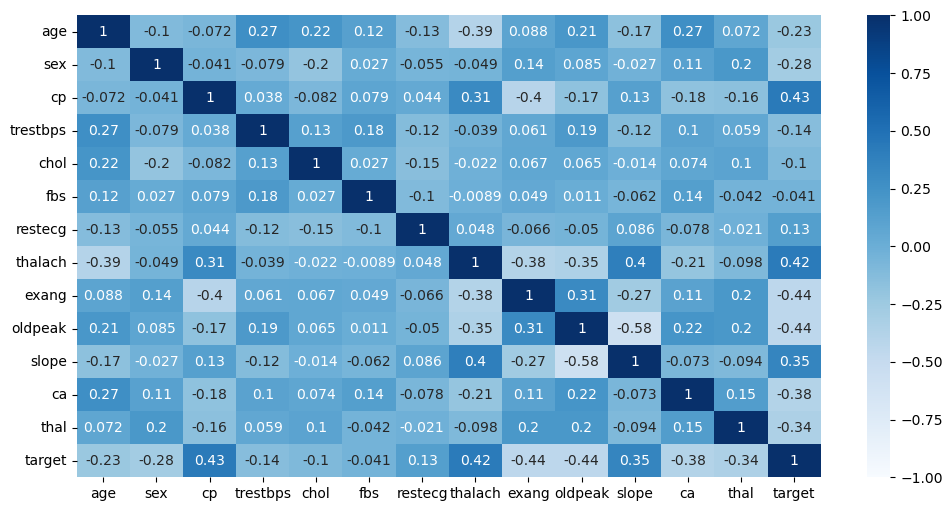

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap='Blues',fmt='.2g')
plt.show()

In [13]:
from ydata_profiling import ProfileReport


In [14]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#prof=ProfileReport(df)

In [16]:
#prof.to_file(output_file='output.html')

#### EDA 

#### Treating duplicate values 

In [17]:
df.duplicated().sum()

723

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Preparing the Data for Train_test_split

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [21]:
x=df.drop(columns='target')

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [23]:
y=df['target']

In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

#### Spliting the data for training and testing

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [26]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train: (226, 13)
Shape of x_test:  (76, 13)
Shape of y_train:  (226,)
Shape of y_test:  (76,)


####  Using Column Transformer 

In [27]:
transformer=ColumnTransformer(transformers=[
    ('Standard',StandardScaler(),[0,-1])
],remainder='passthrough')

In [28]:
x_train_transform=transformer.fit_transform(x_train)

In [29]:
x_test_transform=transformer.transform(x_test)

In [30]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('Standard', StandardScaler(), [0, -1])])>

In [31]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
45,42,1,0,140,226,0,1,178,0,0.0,2,0,2
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2
161,51,1,2,100,222,0,1,143,1,1.2,1,0,2
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,61,1,2,150,243,1,1,137,1,1.0,1,0,2
431,65,0,0,150,225,0,0,114,0,1.0,1,3,3
78,52,1,1,134,201,0,1,158,0,0.8,2,1,2
366,58,1,2,112,230,0,0,165,0,2.5,1,1,3


In [32]:
pd.DataFrame(x_train_transform)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.411387,-0.488634,1.0,0.0,140.0,226.0,0.0,1.0,178.0,0.0,0.0,2.0,0.0
1,-1.411387,-0.488634,1.0,2.0,130.0,180.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0
2,-0.408326,-0.488634,1.0,2.0,100.0,222.0,0.0,1.0,143.0,1.0,1.2,1.0,0.0
3,0.594735,-0.488634,0.0,3.0,150.0,240.0,0.0,1.0,171.0,0.0,0.9,2.0,0.0
4,0.371833,-0.488634,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.706187,-0.488634,1.0,2.0,150.0,243.0,1.0,1.0,137.0,1.0,1.0,1.0,0.0
222,1.151991,1.184568,0.0,0.0,150.0,225.0,0.0,0.0,114.0,0.0,1.0,1.0,3.0
223,-0.296875,-0.488634,1.0,1.0,134.0,201.0,0.0,1.0,158.0,0.0,0.8,2.0,1.0
224,0.371833,1.184568,1.0,2.0,112.0,230.0,0.0,0.0,165.0,0.0,2.5,1.0,1.0


In [33]:
x_test_transform.shape

(76, 13)

In [34]:
pd.DataFrame(x_test_transform)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.522838,-0.488634,0.0,1.0,126.0,306.0,0.0,1.0,163.0,0.0,0.0,2.0,0.0
1,0.260382,1.184568,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0
2,-0.631228,-0.488634,1.0,1.0,130.0,266.0,0.0,1.0,171.0,0.0,0.6,2.0,0.0
3,1.040540,-0.488634,0.0,0.0,130.0,303.0,0.0,1.0,122.0,0.0,2.0,1.0,2.0
4,-0.408326,-0.488634,0.0,2.0,130.0,256.0,0.0,0.0,149.0,0.0,0.5,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.263443,-0.488634,1.0,0.0,112.0,212.0,0.0,0.0,132.0,1.0,0.1,2.0,1.0
72,-0.519777,-0.488634,0.0,1.0,120.0,244.0,0.0,1.0,162.0,0.0,1.1,2.0,0.0
73,-0.073972,-0.488634,0.0,1.0,132.0,288.0,1.0,0.0,159.0,1.0,0.0,2.0,1.0
74,1.040540,1.184568,1.0,2.0,125.0,309.0,0.0,1.0,131.0,1.0,1.8,1.0,0.0


In [35]:
knn = KNeighborsClassifier(n_neighbors=2)

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
knn_pred = knn.predict(x_test)

In [38]:
knn_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [39]:
knn.score(x_train,y_train)

0.8097345132743363

In [40]:
accuracy_score(y_test,knn_pred)*100

53.94736842105263

In [41]:
### KNN model is overfited 

In [42]:
cf_knn  = confusion_matrix(y_test,knn_pred)

In [43]:
cf_knn

array([[24,  9],
       [26, 17]], dtype=int64)

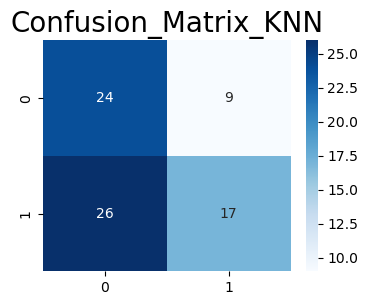

In [44]:
plt.figure(figsize=(4,3))
plt.title('Confusion_Matrix_KNN',fontsize=20)
sns.heatmap(cf_knn,cmap='Blues',annot=True,fmt='.2g')
plt.show()

In [45]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.48      0.73      0.58        33
           1       0.65      0.40      0.49        43

    accuracy                           0.54        76
   macro avg       0.57      0.56      0.54        76
weighted avg       0.58      0.54      0.53        76



In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
lr_pred = lr.predict(x_test)

In [50]:
lr_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [51]:
accuracy_score(y_test,lr_pred)*100

85.52631578947368

In [52]:
lr.score(x_train,y_train)*100

85.84070796460178

In [53]:
cf_lr  = confusion_matrix(y_test,lr_pred)

In [54]:
cf_lr

array([[28,  5],
       [ 6, 37]], dtype=int64)

In [55]:
cf_knn

array([[24,  9],
       [26, 17]], dtype=int64)

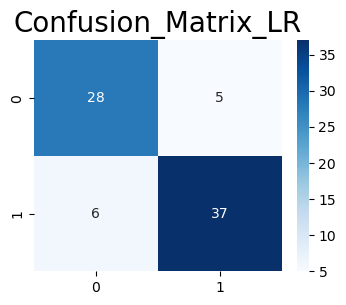

In [56]:
plt.figure(figsize=(4,3))
plt.title('Confusion_Matrix_LR',fontsize=20)
sns.heatmap(cf_lr,cmap='Blues',annot=True,fmt='g')
plt.show()

In [57]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.88      0.86      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb = GaussianNB()

In [60]:
nb.fit(x_train,y_train)

GaussianNB()

In [61]:
nb_pred = nb.predict(x_test)

In [62]:
nb_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [63]:
nb.score(x_train,y_train)*100

85.39823008849558

In [64]:
accuracy_score(y_test,nb_pred)*100

78.94736842105263

In [65]:
#### Naive Bayes is overfitted here 

In [66]:
cf_nb  = confusion_matrix(y_test,nb_pred)

In [67]:
cf_nb

array([[27,  6],
       [10, 33]], dtype=int64)

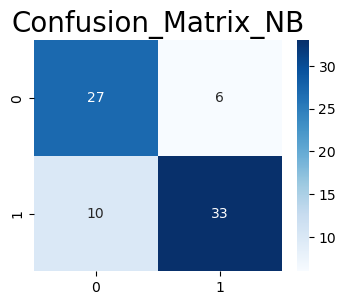

In [68]:
plt.figure(figsize=(4,3))
plt.title('Confusion_Matrix_NB',fontsize=20)
sns.heatmap(cf_nb,cmap='Blues',annot=True,fmt='g')
plt.show()

In [69]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        33
           1       0.85      0.77      0.80        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



In [70]:
from sklearn.svm import SVC

In [71]:
sv = SVC()

In [72]:
sv.fit(x_train,y_train)

SVC()

In [73]:
sv_pred = sv.predict(x_test)

In [74]:
sv_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [75]:
accuracy_score(y_test,sv_pred)*100

69.73684210526315

In [76]:
sv.score(x_train,y_train)*100

65.48672566371681

In [77]:
cf_sv  = confusion_matrix(y_test,sv_pred)

In [78]:
cf_sv

array([[16, 17],
       [ 6, 37]], dtype=int64)

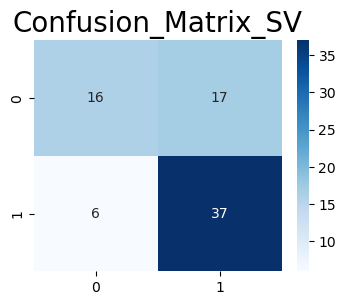

In [79]:
plt.figure(figsize=(4,3))
plt.title('Confusion_Matrix_SV',fontsize=20)
sns.heatmap(cf_sv,cmap='Blues',annot=True,fmt='g')
plt.show()

In [80]:
sv1 = SVC(kernel='linear',C=1,gamma='auto')

In [81]:
sv1.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [82]:
sv1_pred = sv1.predict(x_test)

In [83]:
sv1_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [84]:
sv1.score(x_train,y_train)*100

86.28318584070797

In [85]:
accuracy_score(y_test,sv1_pred)*100

85.52631578947368

In [86]:
# The Model is slightly overfitted 

In [87]:
cf_sv1  = confusion_matrix(y_test,sv1_pred)

In [88]:
cf_sv1

array([[27,  6],
       [ 5, 38]], dtype=int64)

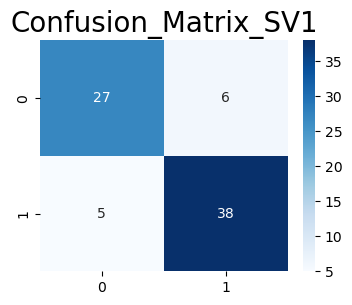

In [89]:
plt.figure(figsize=(4,3))
plt.title('Confusion_Matrix_SV1',fontsize=20)
sns.heatmap(cf_sv1,cmap='Blues',annot=True,fmt='g')
plt.show()

In [90]:
print(classification_report(y_test,sv1_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



#### Among the all model Logistic regression is giving good accuracy of 85.52 with no overfitting 